In [1]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = quandl.get("WIKI/GOOGL")
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

In [3]:
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.072956    0.324968   44659000.0
2004-08-20   54.322689  7.921706    7.227007   22834300.0
2004-08-23   54.869377  4.049360   -1.227880   18256100.0
2004-08-24   52.597363  7.657099   -5.726357   15247300.0
2004-08-25   53.164113  3.886792    1.183658    9188600.0


In [4]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01* len(df)))

In [5]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [6]:
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  8.072956    0.324968   44659000.0  69.078238
2004-08-20   54.322689  7.921706    7.227007   22834300.0  67.839414
2004-08-23   54.869377  4.049360   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  7.657099   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  3.886792    1.183658    9188600.0  71.219849


In [7]:
df.dropna(inplace=True)
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])
# X =  selects df except for label column, 

In [8]:
X = preprocessing.scale(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
clf = svm.SVR()

In [11]:
clf.fit(X_train, y_train)

SVR()

In [12]:
confidence = clf.score(X_test, y_test)
print(confidence)

0.7809695160334553


In [14]:
clf = LinearRegression()
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.977667985058783


In [15]:
#clf = LinearRegression(n_jobs=-1)
#n_jobs param makes use of all threads 

In [16]:
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear 0.9756603479579081
poly 0.6358223017604843
rbf 0.7809695160334553
sigmoid 0.8820365321614497


In [22]:
len(X)

3354

In [23]:
len(y)

3389

In [24]:
X_lately = X[-forecast_out:]
len(X_lately)

35

In [25]:
y = y[:-forecast_out]
len(y)

3354

In [26]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
df.dropna(inplace=True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
clf = LinearRegression(n_jobs=1)
clf.fit(X_train, y_train)
condidence = clf.score(X_test, y_test)
print(confidence)

0.8820365321614497


In [27]:
forecast_set = clf.predict(X_lately)
print(forecast_set, confidence, forecast_out)

[1078.29307353 1092.43077603 1106.04361092 1100.9924028  1094.62499892
 1092.42683907 1091.03968445 1087.27708662 1081.529646   1077.06404657
 1075.1628033  1093.33833571 1111.9015978  1117.50171079 1132.01067964
 1136.32620284 1134.64244233 1132.28015303 1134.03443103 1151.40495652
 1151.34430562 1160.75364329 1157.50597193 1165.68836091 1185.30817542
 1198.63830452 1192.69021903 1204.57909761 1209.24690244 1208.83101062
 1199.59640098 1204.45794961 1203.16383428 1138.77240943 1083.79327059] 0.8820365321614497 35


In [28]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

In [29]:
style.use('ggplot')

In [30]:
df['Forecast'] = np.nan

In [31]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [32]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix +=86400
    df.loc['next_date'] =[np.nan for _ in range(len(df.columns) -1)] + [i]

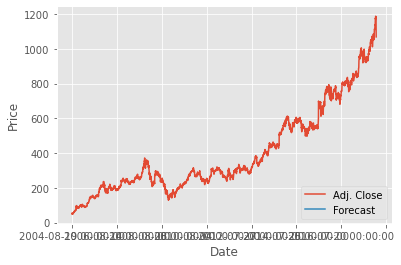

In [33]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [35]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2018-01-31 00:00:00,1182.22,1.202822,-0.134312,1643877.0,1053.15,NaN
2018-02-01 00:00:00,1181.59,1.530988,0.476195,2774967.0,1026.55,NaN
2018-02-02 00:00:00,1119.20,1.798606,-0.729098,5798880.0,1054.09,NaN
2018-02-05 00:00:00,1068.76,5.450241,-2.893850,3742469.0,1006.94,NaN
next_date,NaN,NaN,NaN,NaN,NaN,1083.793271
